<a href="https://colab.research.google.com/github/lilyzhizhou/datathon-3/blob/main/Prediabetes_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
# Import Diabetes Data - add your file path in a separate line

# Lily
data_raw = pd.read_excel('/content/drive/MyDrive/Machine Learning /Datathon #3/Diabetes Study File 10K Dec 14 2017.xlsx')

# Kat
#from google.colab import files
#uploaded = files.upload()
#data_raw = pd.read_excel('Diabetes Study File 10K Dec 14 2017.xlsx')

#Paijani
#data_raw = pd.read_excel('/content/drive/MyDrive/Datathon #3/Diabetes Study File 10K Dec 14 2017.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
data_raw = data_raw.sort_values('Patient_ID')

print(data_raw.shape) #view size of dataset
data_raw.head() #view first rows of dataset
data_raw.dtypes #view data type of each variable

(10000, 43)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

Filter to only pre-diabetic and non-diabetic observations

---





In [59]:
datapd = data_raw[data_raw['FBS'] <= 6.9] # filter by pre-diabetic threshold for FBS
datapd = datapd[datapd['A1c'] <= 6.4] # filter by pre-diabetic threshold for A1c

print(datapd.shape)
datapd.head()

(6414, 43)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
2,63,133.0,2012-07-31,30.9,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
2386,66,112.0,2010-05-13,23.6,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,1,3.54,2010-04-01,0,NaT,1,2004-05-03,1,2007-10-04,1,2010-09-02,0,NaT,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000004538,NaT,NaT,No
7781,68,122.0,2014-04-23,34.3,2014-03-05,3.09,2014-03-18,1.81,2014-03-18,5.9,2014-03-18,1.44,2014-03-18,5.5,2014-03-18,1,5.55,2014-03-18,1,2009-09-03,1,2010-11-08,1,2009-09-03,1,2014-06-19,0,NaT,CANDESARTAN / HYDROCHLOROTHIAZIDE,2009-09-03,NaN,NaT,Female,40415.0,40059.0,39869.0,39869.0,False,True,1001000000007331,2009-02-18,2008-02-18,Yes
7644,73,118.0,2008-10-02,28.5,2008-11-13,1.04,2008-11-12,0.94,2008-11-12,5.7,2008-11-12,1.35,2008-11-12,6.1,2008-08-20,1,3.78,2009-09-01,1,2006-01-19,1,2014-03-11,1,2009-05-28,0,NaT,1,2005-11-03,CANDESARTAN,2005-07-14,PREDNISONE,2005-10-26,Female,40057.0,38736.0,40057.0,38736.0,False,False,1001000000007333,2006-01-12,2005-01-12,Yes
2290,53,109.0,2014-04-30,33.4,2014-04-30,2.96,2014-05-17,1.53,2014-05-17,5.8,2014-05-17,1.97,2014-05-17,5.9,2014-05-17,1,5.38,2014-05-17,0,NaT,0,NaT,1,2010-12-01,1,2008-07-04,0,NaT,ATENOLOL,2010-12-01,HYDROCORTISONE AND ANTIINFECTIVES,2007-03-09,Female,NaN,NaN,NaN,NaN,NaN,NaN,1001000000009032,NaT,NaT,No


we have 6414 observations after filtering

Creating new variables

---



In [60]:
# Creating new binary variables for medication variables
datapd['corstrd_bin'] = datapd['Corticosteroids'].notna().astype(int)
datapd['htnmed_bin'] = datapd['Hypertension_Medications'].notna().astype(int)

# Creating new binary pre-diabetes variable
condition = ((datapd['FBS'] >= 6.1) & (datapd['FBS'] <= 6.9)) | ((datapd['A1c'] >= 6.0) & (datapd['A1c'] <= 6.4))

# Create the 'predm' variable based on the conditions
datapd['predm'] = condition.astype(int)

datapd.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES,corstrd_bin,htnmed_bin,predm
2,63,133.0,2012-07-31,30.9,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No,0,1,1
2386,66,112.0,2010-05-13,23.6,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,1,3.54,2010-04-01,0,NaT,1,2004-05-03,1,2007-10-04,1,2010-09-02,0,NaT,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000004538,NaT,NaT,No,0,1,1
7781,68,122.0,2014-04-23,34.3,2014-03-05,3.09,2014-03-18,1.81,2014-03-18,5.9,2014-03-18,1.44,2014-03-18,5.5,2014-03-18,1,5.55,2014-03-18,1,2009-09-03,1,2010-11-08,1,2009-09-03,1,2014-06-19,0,NaT,CANDESARTAN / HYDROCHLOROTHIAZIDE,2009-09-03,NaN,NaT,Female,40415.0,40059.0,39869.0,39869.0,False,True,1001000000007331,2009-02-18,2008-02-18,Yes,0,1,0
7644,73,118.0,2008-10-02,28.5,2008-11-13,1.04,2008-11-12,0.94,2008-11-12,5.7,2008-11-12,1.35,2008-11-12,6.1,2008-08-20,1,3.78,2009-09-01,1,2006-01-19,1,2014-03-11,1,2009-05-28,0,NaT,1,2005-11-03,CANDESARTAN,2005-07-14,PREDNISONE,2005-10-26,Female,40057.0,38736.0,40057.0,38736.0,False,False,1001000000007333,2006-01-12,2005-01-12,Yes,1,1,1
2290,53,109.0,2014-04-30,33.4,2014-04-30,2.96,2014-05-17,1.53,2014-05-17,5.8,2014-05-17,1.97,2014-05-17,5.9,2014-05-17,1,5.38,2014-05-17,0,NaT,0,NaT,1,2010-12-01,1,2008-07-04,0,NaT,ATENOLOL,2010-12-01,HYDROCORTISONE AND ANTIINFECTIVES,2007-03-09,Female,NaN,NaN,NaN,NaN,NaN,NaN,1001000000009032,NaT,NaT,No,1,1,0


Selecting variables to include

---



In [61]:
# Remove least0 variables from dataset
deletelist = [col for col in data_raw.columns if col.startswith('least') or col == 'LeastOfAll']
datapd = datapd.drop(deletelist, axis=1)

# Keeping only variables that are relevant to our study
datapd = datapd[["predm","Age_at_Exam","BMI","Total_Cholesterol","Depression","HTN","OA","COPD","corstrd_bin","htnmed_bin","Sex","Patient_ID"]]

# Making Sex variable into integer
datapd['Sex'].replace({'Female': 0 ,'Male': 1}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [62]:
# Removing implausable values from total cholesterol

datapd['Total_Cholesterol'] = datapd['Total_Cholesterol'].replace(0, np.nan)

datapd.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,predm,Age_at_Exam,BMI,Total_Cholesterol,Depression,HTN,OA,COPD,corstrd_bin,htnmed_bin,Sex,Patient_ID
2,1,63,30.9,NaN,0,1,0,1,0,1,1,1001000000000054
2386,1,66,23.6,3.54,1,1,1,0,0,1,1,1001000000004538
7781,0,68,34.3,5.55,1,1,1,0,0,1,0,1001000000007331
7644,1,73,28.5,3.78,1,1,0,1,1,1,0,1001000000007333
2290,0,53,33.4,5.38,0,1,1,0,1,1,0,1001000000009032


In [63]:
# Export dataset to shared drive
datapd.to_csv('datapd.csv')
!cp datapd.csv "/content/drive/MyDrive/Machine Learning /Datathon #3"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Data Exploration

---



In [64]:
# Convert numeric categorical variables into descriptive categories
datapd_dscrpt = datapd.copy()

datapd_dscrpt['predm'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['Depression'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['HTN'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['OA'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['COPD'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['corstrd_bin'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['htnmed_bin'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)

datapd_dscrpt.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,predm,Age_at_Exam,BMI,Total_Cholesterol,Depression,HTN,OA,COPD,corstrd_bin,htnmed_bin,Sex,Patient_ID
2,Yes,63,30.9,NaN,No,Yes,No,Yes,No,Yes,1,1001000000000054
2386,Yes,66,23.6,3.54,Yes,Yes,Yes,No,No,Yes,1,1001000000004538
7781,No,68,34.3,5.55,Yes,Yes,Yes,No,No,Yes,0,1001000000007331
7644,Yes,73,28.5,3.78,Yes,Yes,No,Yes,Yes,Yes,0,1001000000007333
2290,No,53,33.4,5.38,No,Yes,Yes,No,Yes,Yes,0,1001000000009032


In [65]:
# create list of numerical, categorical, multinomial features
target_column = 'predm'
categorical_columns = ['Depression', 'HTN',
                       'OA', 'COPD', 'Sex',
                       'corstrd_bin','htnmed_bin']
#multinomial_columns = [] there are none
numerical_columns = ['Age_at_Exam','BMI','Total_Cholesterol']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [66]:
# Checking for any NA values
print(datapd.shape)
print(datapd.isna().sum())

(6414, 12)
predm                  0
Age_at_Exam            0
BMI                    0
Total_Cholesterol    152
Depression             0
HTN                    0
OA                     0
COPD                   0
corstrd_bin            0
htnmed_bin             0
Sex                    0
Patient_ID             0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- Only Total_Cholesterol is missing observations

In [67]:
# Calculate the percentage of rows with one or more missing values
percentage_missing_rows = (datapd[numerical_columns + categorical_columns + [target_column]].isnull().sum(axis=1) > 0).sum() / len(datapd)
percentage_missing_rows

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.02369816027439975

if we were to remove all missing observations, we would lose 2% of our data


In [68]:
# Check frequency of patient IDs
id_counts = datapd['Patient_ID'].value_counts()
print(id_counts.value_counts())

id_counts_pd = datapd[datapd['predm'] == 1]['Patient_ID'].value_counts()
print("Pre-Diabetes Subset")
print(id_counts_pd.value_counts())

1    5314
2     415
3      67
4      14
7       1
6       1
Name: Patient_ID, dtype: int64
Pre-Diabetes Subset
1    2130
2     187
3      27
4       6
7       1
Name: Patient_ID, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- around 17% of our data contains people who have visited more than once
- evenly distributed between non-diabetic and pre-diabetic groups (56% v 44%)
- will need to address independence problem




In [69]:
# Checking for Pre-Diabetes imbalance

# Compute the count of each class in the 'target' column
counts = datapd_dscrpt['predm'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of predm',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in predm',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



- Good balance of pre-diabetic and non-diabetic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



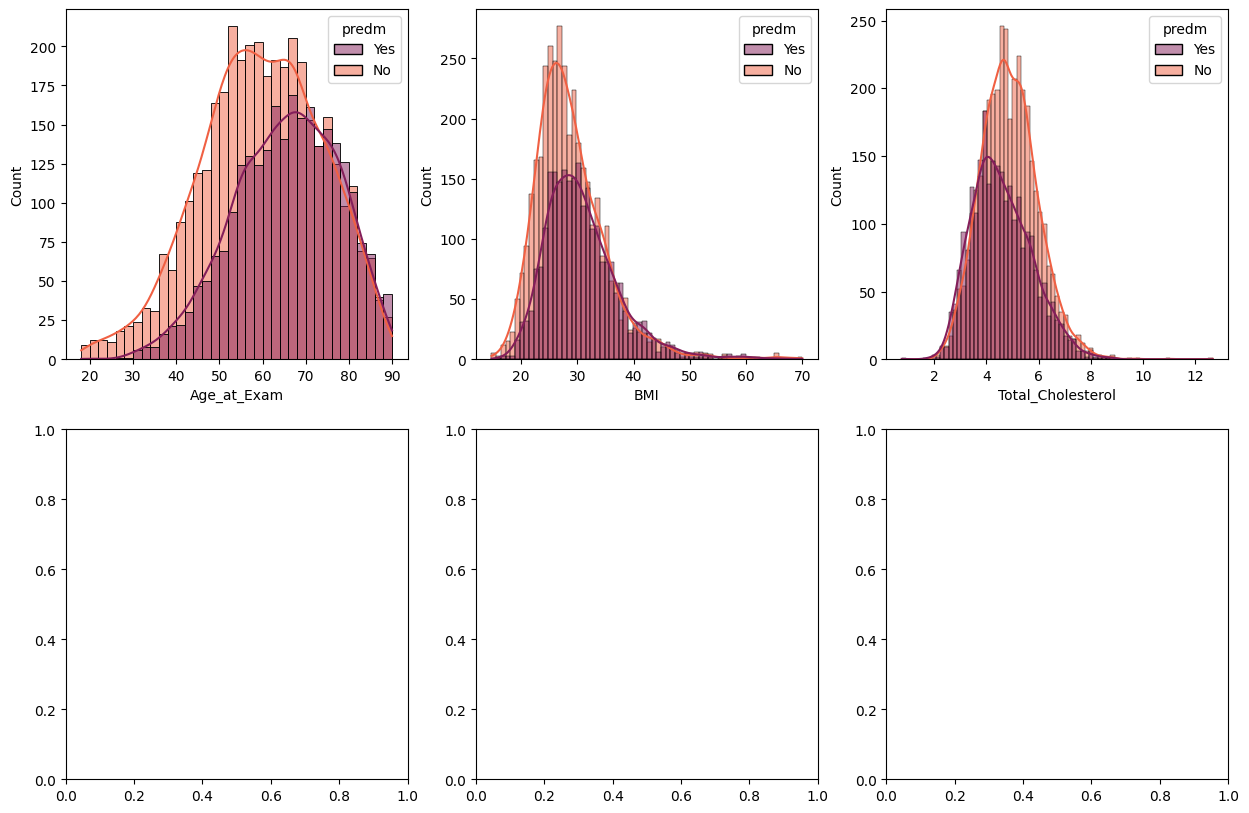

In [70]:
# checking the difference in distribution of numerical features in two classes

# Create a grid of subplots with 1 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(datapd_dscrpt, x=column, hue= target_column, kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

- older age for those who are prediabetic
- higher bmi for those who are prediabetic
- lower total cholesterol for those who are prediabetic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<Axes: >

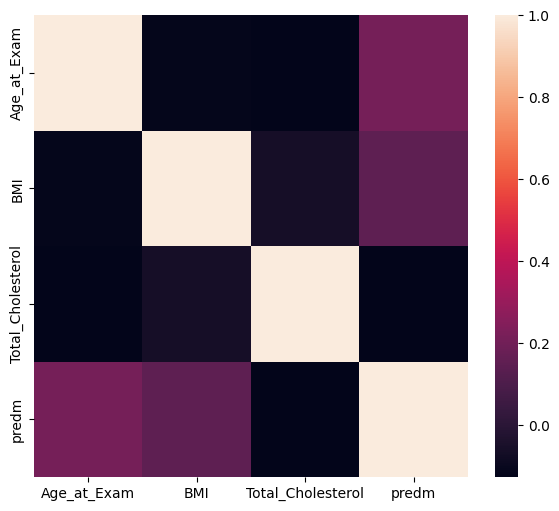

In [71]:
# correlation matrix

plt.figure(figsize=(7,6))
sns.heatmap(datapd[numerical_columns + [target_column]].corr())

Table 1

---



In [15]:
# Import tableone
try:
    from tableone import TableOne, load_dataset
except (ModuleNotFoundError, ImportError):
    # install on Colab
    !pip install tableone
    from tableone import TableOne, load_dataset

In [72]:
# Run Table One
categorical = ['predm','Depression', 'HTN',
                       'OA', 'COPD', 'Sex',
                       'corstrd_bin','htnmed_bin']
numerical = ['Age_at_Exam','BMI','Total_Cholesterol']

groupby = ['predm']

table2 = TableOne(datapd_dscrpt, categorical=categorical, groupby=groupby,
                  nonnormal=numerical, min_max= numerical)
table2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Grouped by predm                                                                                                                           
                                                 Missing                                  Overall                                       No                                      Yes
n                                                                                            6414                                     3798                                     2616
predm, n (%)                        No                 0                              3798 (59.2)                             3798 (100.0)                                         
                                    Yes                                               2616 (40.8)                                                                      2616 (100.0)
Age_at_Exam, median [min,max]                          0                         63.0 [18.0,90.0]                         60.0 [18.0,90.0]                         66.0 [20.0,90.0]
BMI, median [min,max]                                  0                         28.6 [14.7,70.0]                         27.8 [14.7,69.5]                         29.9 [16.0,70.0]
Total_Cholesterol, median [min,max]                  152                           4.7 [0.8,12.7]                           4.8 [2.1,12.7]                            4.5 [0.8,8.8]
Depression, n (%)                   No                 0                              4978 (77.6)                              2931 (77.2)                              2047 (78.2)
                                    Yes                                               1436 (22.4)                               867 (22.8)                               569 (21.8)
HTN, n (%)                          No                 0                              2587 (40.3)                              1830 (48.2)                               757 (28.9)
                                    Yes                                               3827 (59.7)                              1968 (51.8)                              1859 (71.1)
OA, n (%)                           No                 0                              4449 (69.4)                              2728 (71.8)                              1721 (65.8)
                                    Yes                                               1965 (30.6)                              1070 (28.2)                               895 (34.2)
COPD, n (%)                         No                 0                              5793 (90.3)                              3482 (91.7)                              2311 (88.3)
                                    Yes                                                 621 (9.7)                                316 (8.3)                               305 (11.7)
corstrd_bin, n (%)                  No                 0                              4585 (71.5)                              2762 (72.7)                              1823 (69.7)
                                    Yes                                               1829 (28.5)                              1036 (27.3)                               793 (30.3)
htnmed_bin, n (%)                   No                 0                              2365 (36.9)                              1759 (46.3)                               606 (23.2)
                                    Yes                                               4049 (63.1)                              2039 (53.7)                              2010 (76.8)
Sex, n (%)                          0                  0                              3566 (55.6)                              2196 (57.8)                              1370 (52.4)
                                    1                                                 2848 (44.4)                              1602 (42.2)                              1246 (47.6)
Patient_ID, mean (SD)                                  0  3797332914083446.5 (23